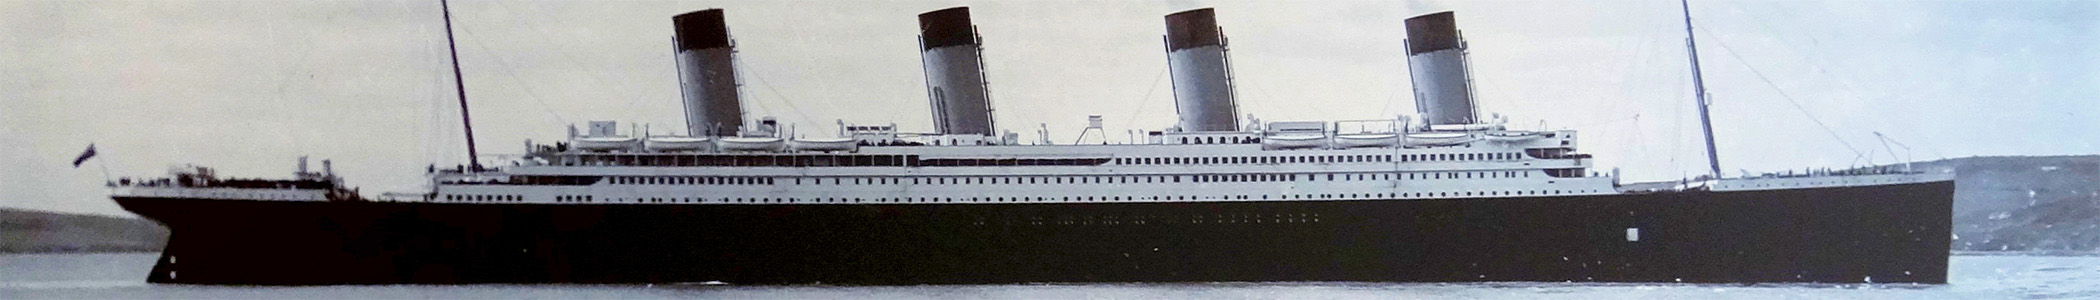

# **1. Entendimiento del negocio**
---

- Descripción

Imagen



## **1.1. Objetivos**

- *Realizar un análisis exploratorio de datos al dataset* **`titanic.csv`**.

- *Analisis de regresión para validar ...*.


# **2. Entendimiento de los datos**
---

## **2.0. Conjunto de datos**

Se hace uso del dataset diamonds, el cual contiene el precio y atributos de cerca de 54.000 diamantes. Las variables que incluye este conjunto de datos son las siguientes:

| Variable | Descripción	| Tipo | 
| --- | --- | --- |
|**price**|Precio en dólares estadounidenses. | Cuantitativa-variable objetivo.
|
|**carat**|Quilates (masa del diamante). | Cuantitativa. |
|**cut**|Calidad del corte (Fair, Good, Very Good, Premium, Ideal). |Cualitativa-ordinal. |
|**color**| Color del diamante, en escala D (mejor) a J (peor).| Cualitativa-ordinal.|
|**clarity**|Medida de claridad del diamante (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor)). | Cualitativa-ordinal.|
|**depth**|Porcentaje de profundidad - 2 * z / (x + y). | Cuantitativa.|
|**table**| Ancho de la parte superior del diamante, en relación con el punto más ancho. |Cuantitativa |
|**x**| longitud en mm (0--10.74). |Cuantitativa. |
|**y**|ancho en mm (0--58.9). | Cuantitativa.|
|**z**|profundidad en mm (0--31.8). | Cuantitativa.|

Los datos fueron tomados del [dataset Diamonds](https://www.kaggle.com/shivam2503/diamonds) disponible en *Kaggle*.

## **2.1. Importar Paquetes**

Realizamos la importación de las librerías que se utilizaran en el presente informe.

In [308]:
# ==============================
# Importación de librerías necesarias
# ==============================

# Librerías estándar de Python
import os

# Librerías de análisis numérico y manejo de datos
import numpy as np
import pandas as pd

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # Para visualizar valores faltantes

# Librerías de Machine Learning
import sklearn
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder


In [309]:
# Mostrar gráficos dentro del notebook
%matplotlib inline

# Mejor calidad en pantallas
%config InlineBackend.figure_format = 'retina'


# Tema de Seaborn (fondos, rejilla, colores)
sns.set_theme(
    context="notebook",   # Tamaños adaptados a Jupyter ("paper", "talk", "poster")
    style="whitegrid",    # Fondo con rejilla clara
    palette="deep",       # Paleta de colores
    font_scale=1.1        # Escala de fuentes (ajustar si se ve muy grande o muy pequeño)
)

# Ajustes globales de Matplotlib
plt.rcParams["figure.figsize"] = (10, 6)   # Tamaño de las figuras
plt.rcParams["axes.titlesize"] = 14        # Tamaño de los títulos
plt.rcParams["axes.labelsize"] = 12        # Tamaño de las etiquetas
plt.rcParams["legend.fontsize"] = 11       # Tamaño de la leyenda
plt.rcParams["xtick.labelsize"] = 11       # Tamaño ticks eje X
plt.rcParams["ytick.labelsize"] = 11       # Tamaño ticks eje Y

In [310]:
# Versión de Python y las demás librerías.
print('\nEsta actividad se realizó con las siguientes versiones:\n')
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Missingno', msno.__version__)
print('Matplotlib', plt.matplotlib.__version__)
print('Seaborn', sns.__version__)
print('Scikit-learn', sklearn.__version__)


Esta actividad se realizó con las siguientes versiones:

Python 3.10.12
NumPy 2.2.6
Pandas 2.3.2
Missingno 0.5.2
Matplotlib 3.10.6
Seaborn 0.13.2
Scikit-learn 1.7.2


In [311]:
# Directorio Actual
print("Directorio actual:", os.getcwd())

Directorio actual: /home/neo/PROJECTS/IronHack_Esp_Big_Data/13_dia/exercises


## **2.2. Funciones Implementadas**

In [312]:
def load_data(filename: str) -> pd.DataFrame | None:
    """
    Carga un archivo CSV en un DataFrame de pandas desde '../resources/docs',
    manejando errores y codificaciones comunes.
    """
    try:
        base_dir = os.getcwd()
        file_path = os.path.join(base_dir, "..", "resources", "docs", filename)

        if not os.path.exists(file_path):
            raise FileNotFoundError(f"El archivo {file_path} no existe.")

        # Intentar cargar con UTF-8 primero, si falla usar latin-1
        try:
            data = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            data = pd.read_csv(file_path, encoding='latin-1')

        print(f">>> El archivo '{filename}' se cargó correctamente. Filas: {data.shape[0]}, Columnas: {data.shape[1]}")
        return data

    except FileNotFoundError as e:
        print(e)
    except pd.errors.ParserError as e:
        print(f"Error de formato: {e}")
    except Exception as e:
        print(f"Ocurrió un error inesperado: {e}")

    return None

In [313]:
def missing_values(df: pd.DataFrame) -> pd.DataFrame:
    n_cases = df.shape[0]
    summary = pd.DataFrame({
        'variable': df.columns,
        'n_cases': n_cases,
        'n_missing': df.isna().sum().values,
        'pct_missing': (df.isna().sum().values / n_cases * 100)
    })
    return (summary
            .sort_values(by = 'n_missing'
                         ,ascending = False)
            )

In [314]:
def plot_missing_data(df: pd.DataFrame, figsize_bar=(12,5), figsize_matrix=(12,5)):
    """
    Genera gráficos de valores faltantes de un DataFrame usando Missingno:
    - Bar chart
    - Matrix
    """
    
    # Gráfico de barras
    plt.figure(figsize=figsize_bar)
    msno.bar(df)
    plt.show()
    
    # Gráfico de matriz
    plt.figure(figsize=figsize_matrix)
    msno.matrix(df)
    plt.show()

In [315]:
def plot_explorer_data(df: pd.DataFrame, column=None, rotate=0, figsize_bar=(12,5), figsize_matrix=(12,5)):
    """
    Genera gráficos univariados de un DataFrame:
    - Boxplot de variables numéricas para detectar outliers.
    - Boxplot de una columna específica.
    
    Parámetros:
    - df: DataFrame
    - column: nombre de la columna a graficar
    - rotate: 1 -> graficar todas las variables numéricas, 0 -> graficar solo 'column'
    - figsize_bar / figsize_matrix: tamaño de la figura
    """
    
    if rotate == 1:
        plt.figure(figsize=figsize_matrix)
        sns.boxplot(data=df.select_dtypes(include=["number"]))
        plt.xticks(rotation=90)
        plt.title("Boxplot de variables numéricas para detectar outliers")
        plt.show()
    else:
        plt.figure(figsize=figsize_bar)
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot de {column}")
        plt.xlabel(f"{column}")
        plt.show()

## **2.3. Importación de datos**

In [316]:
# 1.1 Cargar el archivo
df = load_data("titanic.csv")

if df is not None:
    print("DataFrame: {df} OK...")

>>> El archivo 'titanic.csv' se cargó correctamente. Filas: 891, Columnas: 12
DataFrame: {df} OK...


## **2.4. Análisis Exploración de Datos [EDA]**

In [317]:
# Tamaño del DataFrame
print("1.Filas:   ", df.shape[0])
print("2.Columnas:", df.shape[1])

1.Filas:    891
2.Columnas: 12


In [318]:
# Descripción del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [319]:
# Visialización de los 5 primeros registros del dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [320]:
# Vista general
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [321]:
# Valores perdidos
missing_values(df)

,variable,n_cases,n_missing,pct_missing
10,Cabin,891,687,77.104377
5,Age,891,177,19.865320
11,Embarked,891,2,0.224467
0,PassengerId,891,0,0.000000
3,Name,891,0,0.000000
2,Pclass,891,0,0.000000
1,Survived,891,0,0.000000
4,Sex,891,0,0.000000
7,Parch,891,0,0.000000
6,SibSp,891,0,0.000000


In [322]:
# Para acceder mas rapidamente a los nombres de las columnas
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [323]:
# Seleccionamos todos los valores distincto del dataset
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [324]:
# Columnas numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("Numéricas:", num_cols)

# Columnas categóricas / objeto
cat_cols = df.select_dtypes(include=["object"]).columns
print("Categóricas:", cat_cols)

Numéricas: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categóricas: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


**Características cualitativas** ( *Categórica* ): Sex, Embarked <br>
**Características cuantitativas** ( *Numérica* ): Pclass, Age, Fare, SibSp, Parch, **[Survived]**.

In [325]:
# Agrupación por la columna categorica "cut" agregando el precio minimo y maximo.
df.groupby('Pclass').agg({'Fare' : [min, max]})

/tmp/ipykernel_1514/4122592782.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('Pclass').agg({'Fare' : [min, max]})
/tmp/ipykernel_1514/4122592782.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('Pclass').agg({'Fare' : [min, max]})


Fare          
        min       max
Pclass               
1       0.0  512.3292
2       0.0   73.5000
3       0.0   69.5500

In [326]:
# Cantidad de ocurrencias por la variable categorica "color"
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [327]:
# Cantidad de ocurrencias por la variable categorica "Sex"
df.groupby('Sex').agg({'Age' : [min, max]})

/tmp/ipykernel_1514/2253754584.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('Sex').agg({'Age' : [min, max]})
/tmp/ipykernel_1514/2253754584.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('Sex').agg({'Age' : [min, max]})


Age      
         min   max
Sex               
female  0.75  63.0
male    0.42  80.0

## **2.5. Descripciones Generales**

El dataset Titanic presenta un problema de clasificación. Se busca predecir la supervivencia de una persona basada en características como la clase del pasajero (**`Pclass`**), su género (**`Sex`**), su edad (**`Age`**), el número de hermanos y pareja a bordo, (**`SibSp`**), el número de padres e hijos a bordo (**`Parch`**), entre otras.

Para mantener las cosas sencillas eliminaremos la variable **`Cabin`** ya que presenta muchos datos faltantes y luego eliminaremos los registros que contentan valores faltantes en algunas de las columnas restantes. También eliminaremos la variable **`PassengerId`** ya que es un identificador y no una variable propia de dataset.

In [328]:
# Vista general
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [329]:
# Validar duplicados
print("Antes:", df.shape)

df.drop_duplicates()
df.duplicated().sum()

print("Después:", df.shape)

Antes: (891, 12)
Después: (891, 12)


## **2.6. Limpieza**

En este proceso de limpieza haremos uso de diferentes herramientas de Pandas que nos permitirán abordar las situaciones que más comúnmente encontraremos en un set de datos tabular, como son:

- El manejo de datos faltantes (que como lo acabamos de ver están presentes en nuestro set de datos)
- La eliminación de columnas irrelevantes (es decir, columnas que no contienen información relacionada con el problema que queremos resolver)
- El manejo de registros (filas) repetidos
- El manejo de valores extremos (u «outliers») para el caso de las variables (columnas) numéricas
- La limpieza de errores tipográficos que puedan existir en las variables categóricas

Y al final de este proceso de limpieza deberíamos tener un set de datos íntegro, listo para la fase de Análisis Exploratorio.

### **2.6.1 Detección y manejo de datos faltantes**

En esencia existen dos técnicas para realizar este manejo de datos faltantes: la `eliminación` (que consiste en simplemente borrar las filas que tengan datos incompletos) o la `imputación` (que consiste en estimar el dato faltante con base en la información conocida).

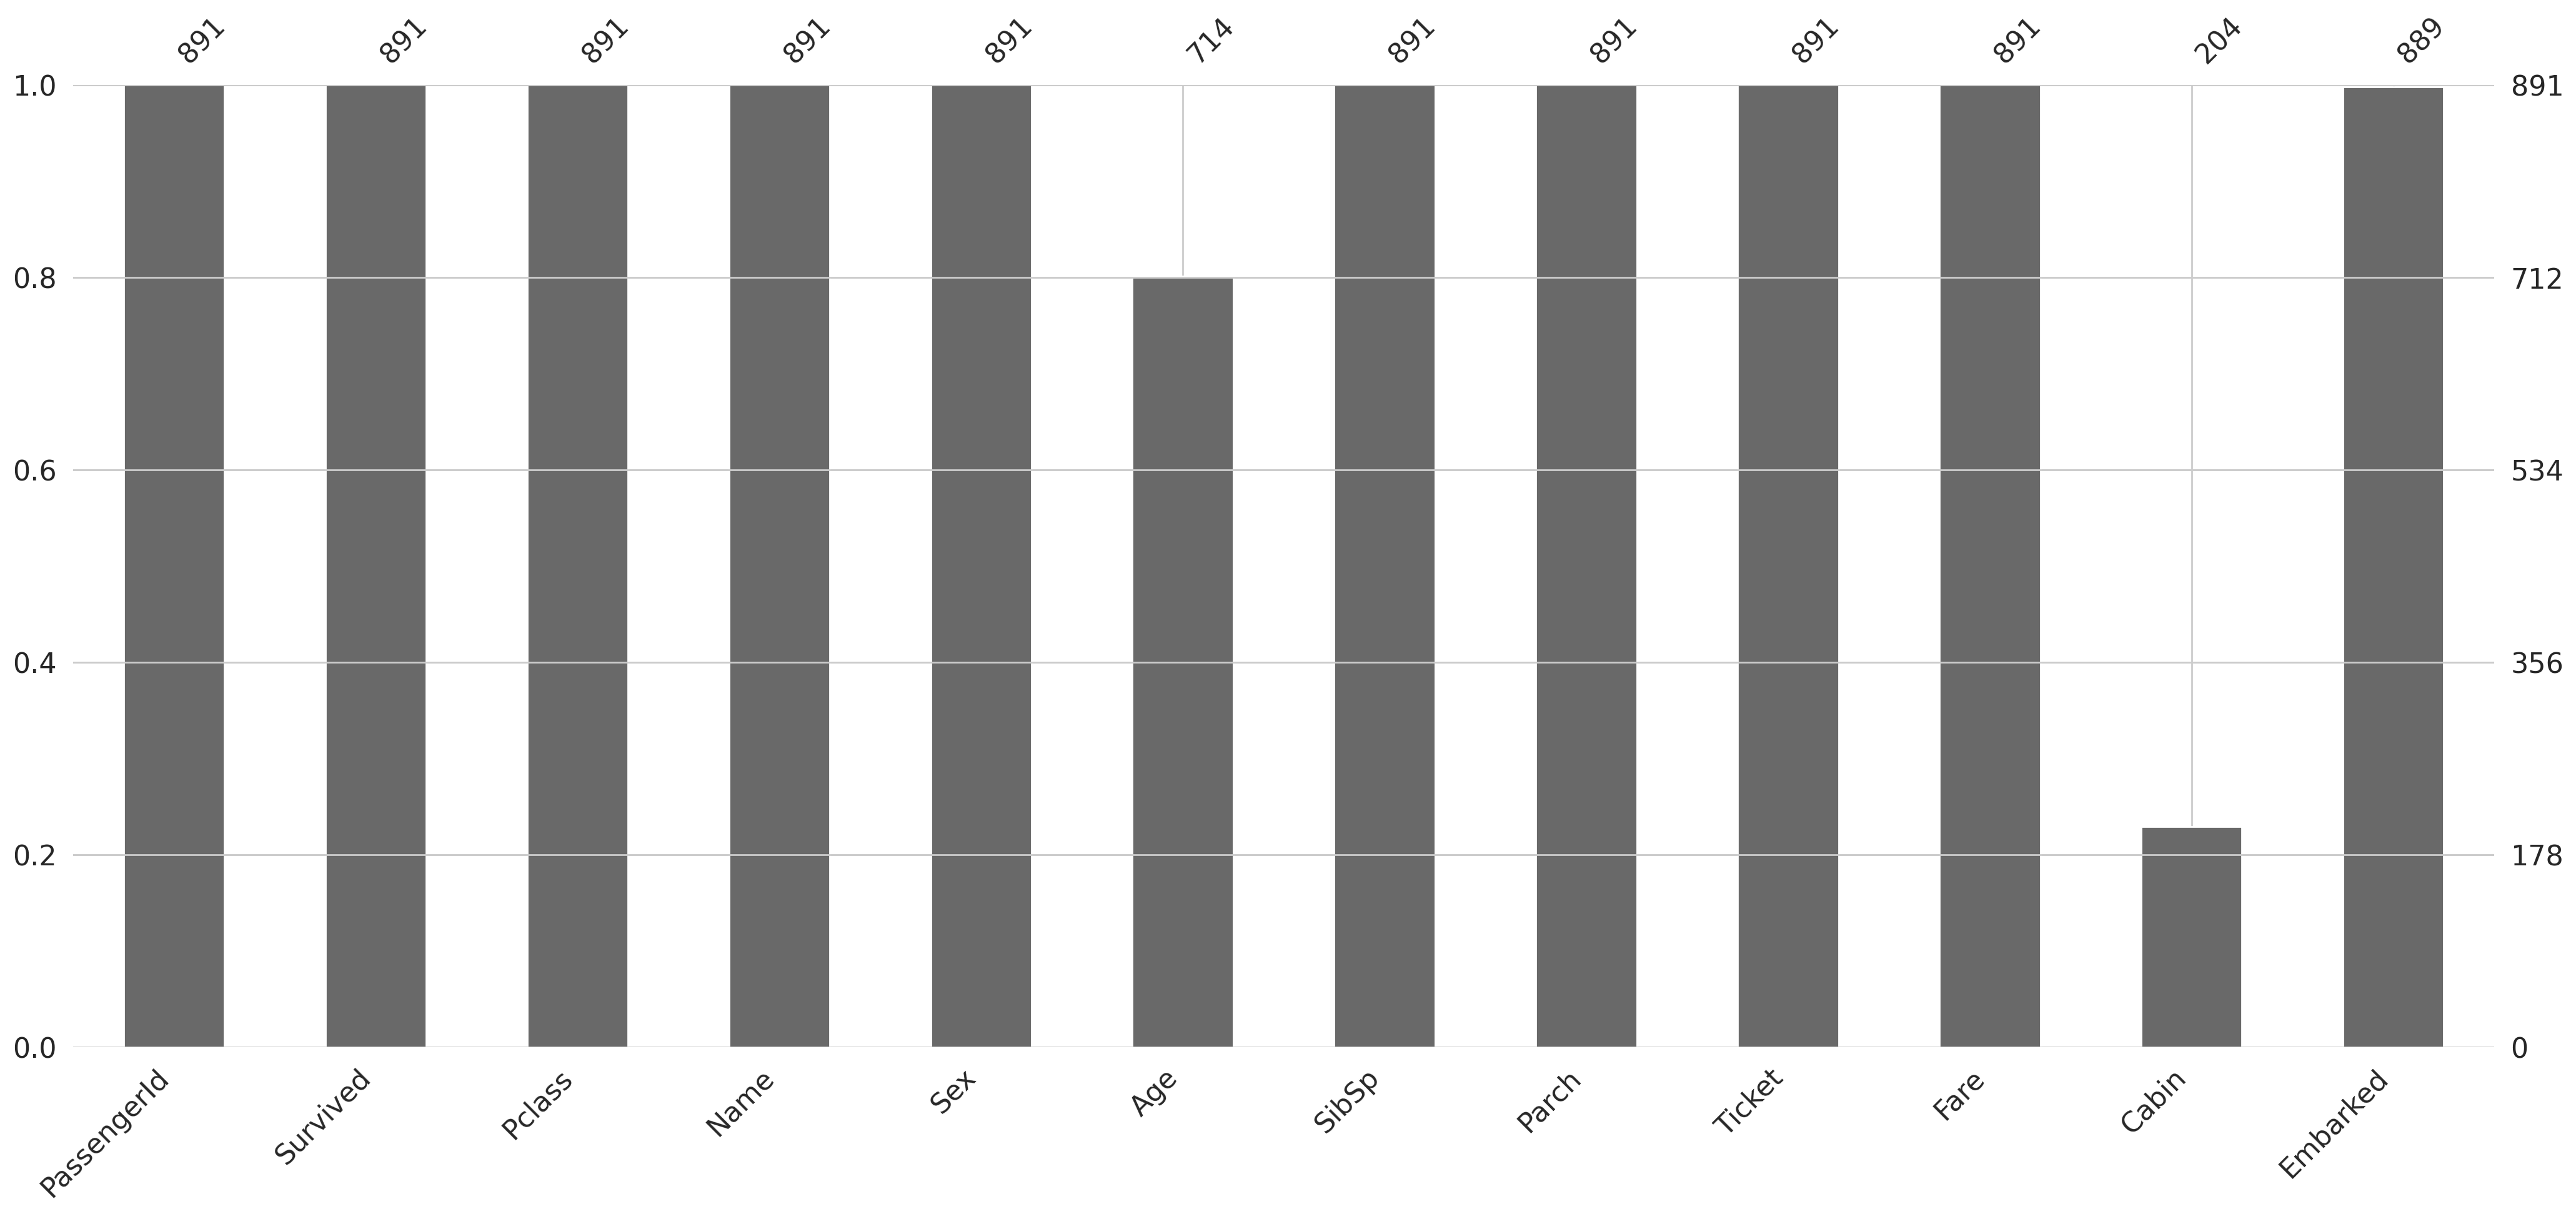

<Figure size 1200x500 with 0 Axes>

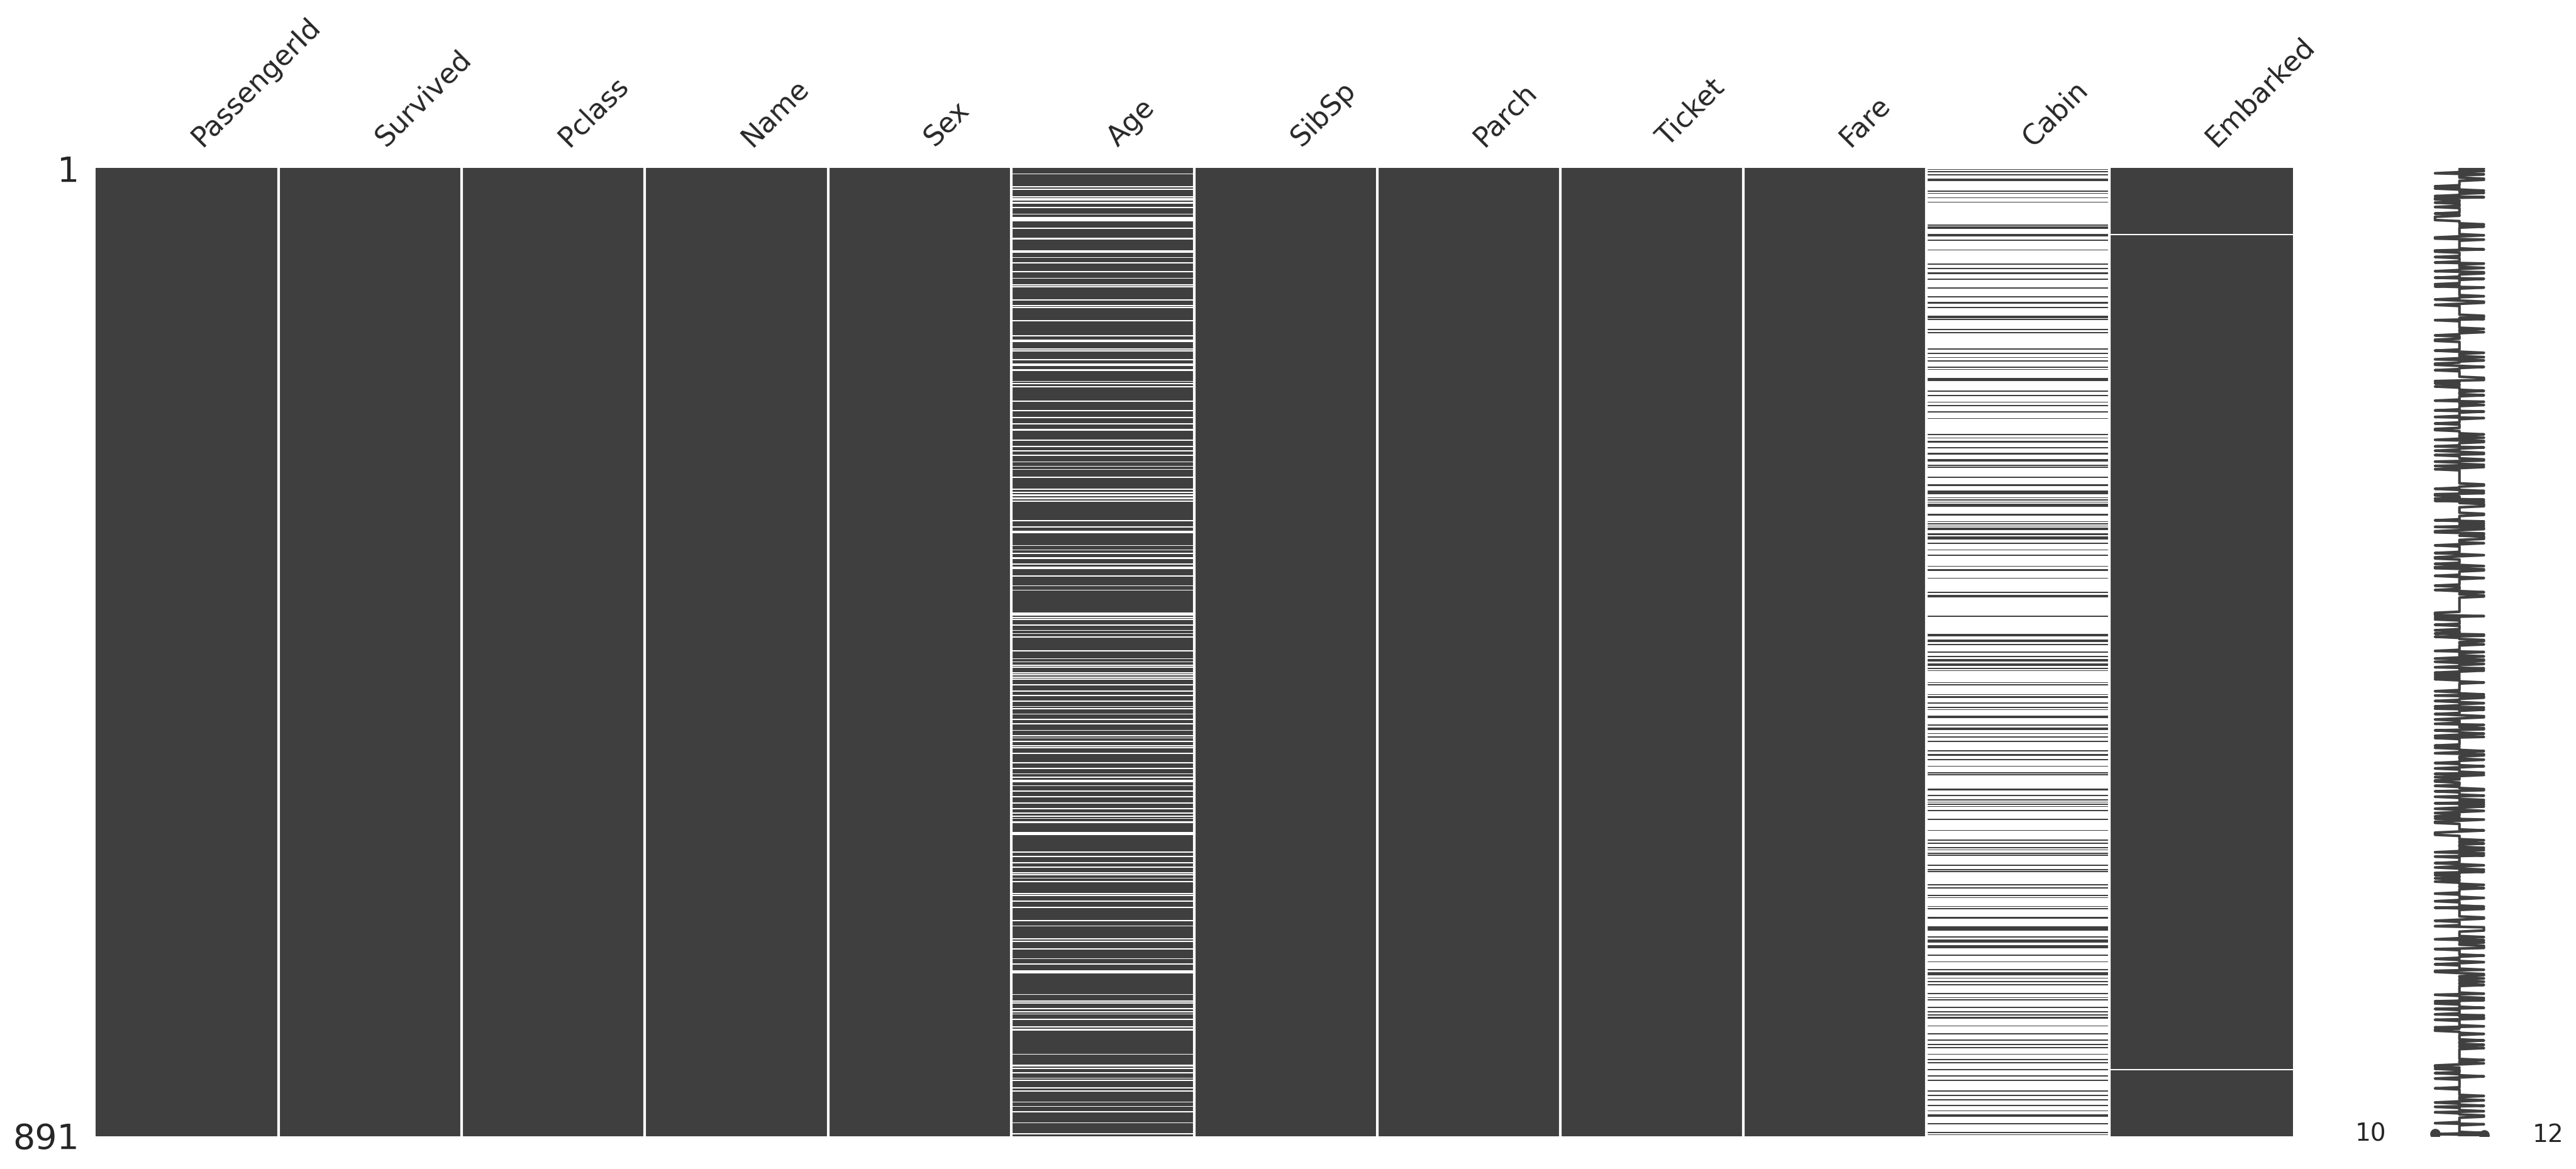

In [330]:
# UDF Graficos de Valores faltantes
plot_missing_data(df)

### **2.6.1.1 Eliminación**

In [331]:
print("Antes:  ", df.shape)

# CheckPoint
df_full = df

# Eliminamos los ejemplos con valores faltantes.
df_clean = df.dropna(axis=0)

print("Después:", df_clean.shape)

Antes:   (891, 12)
Después: (183, 12)


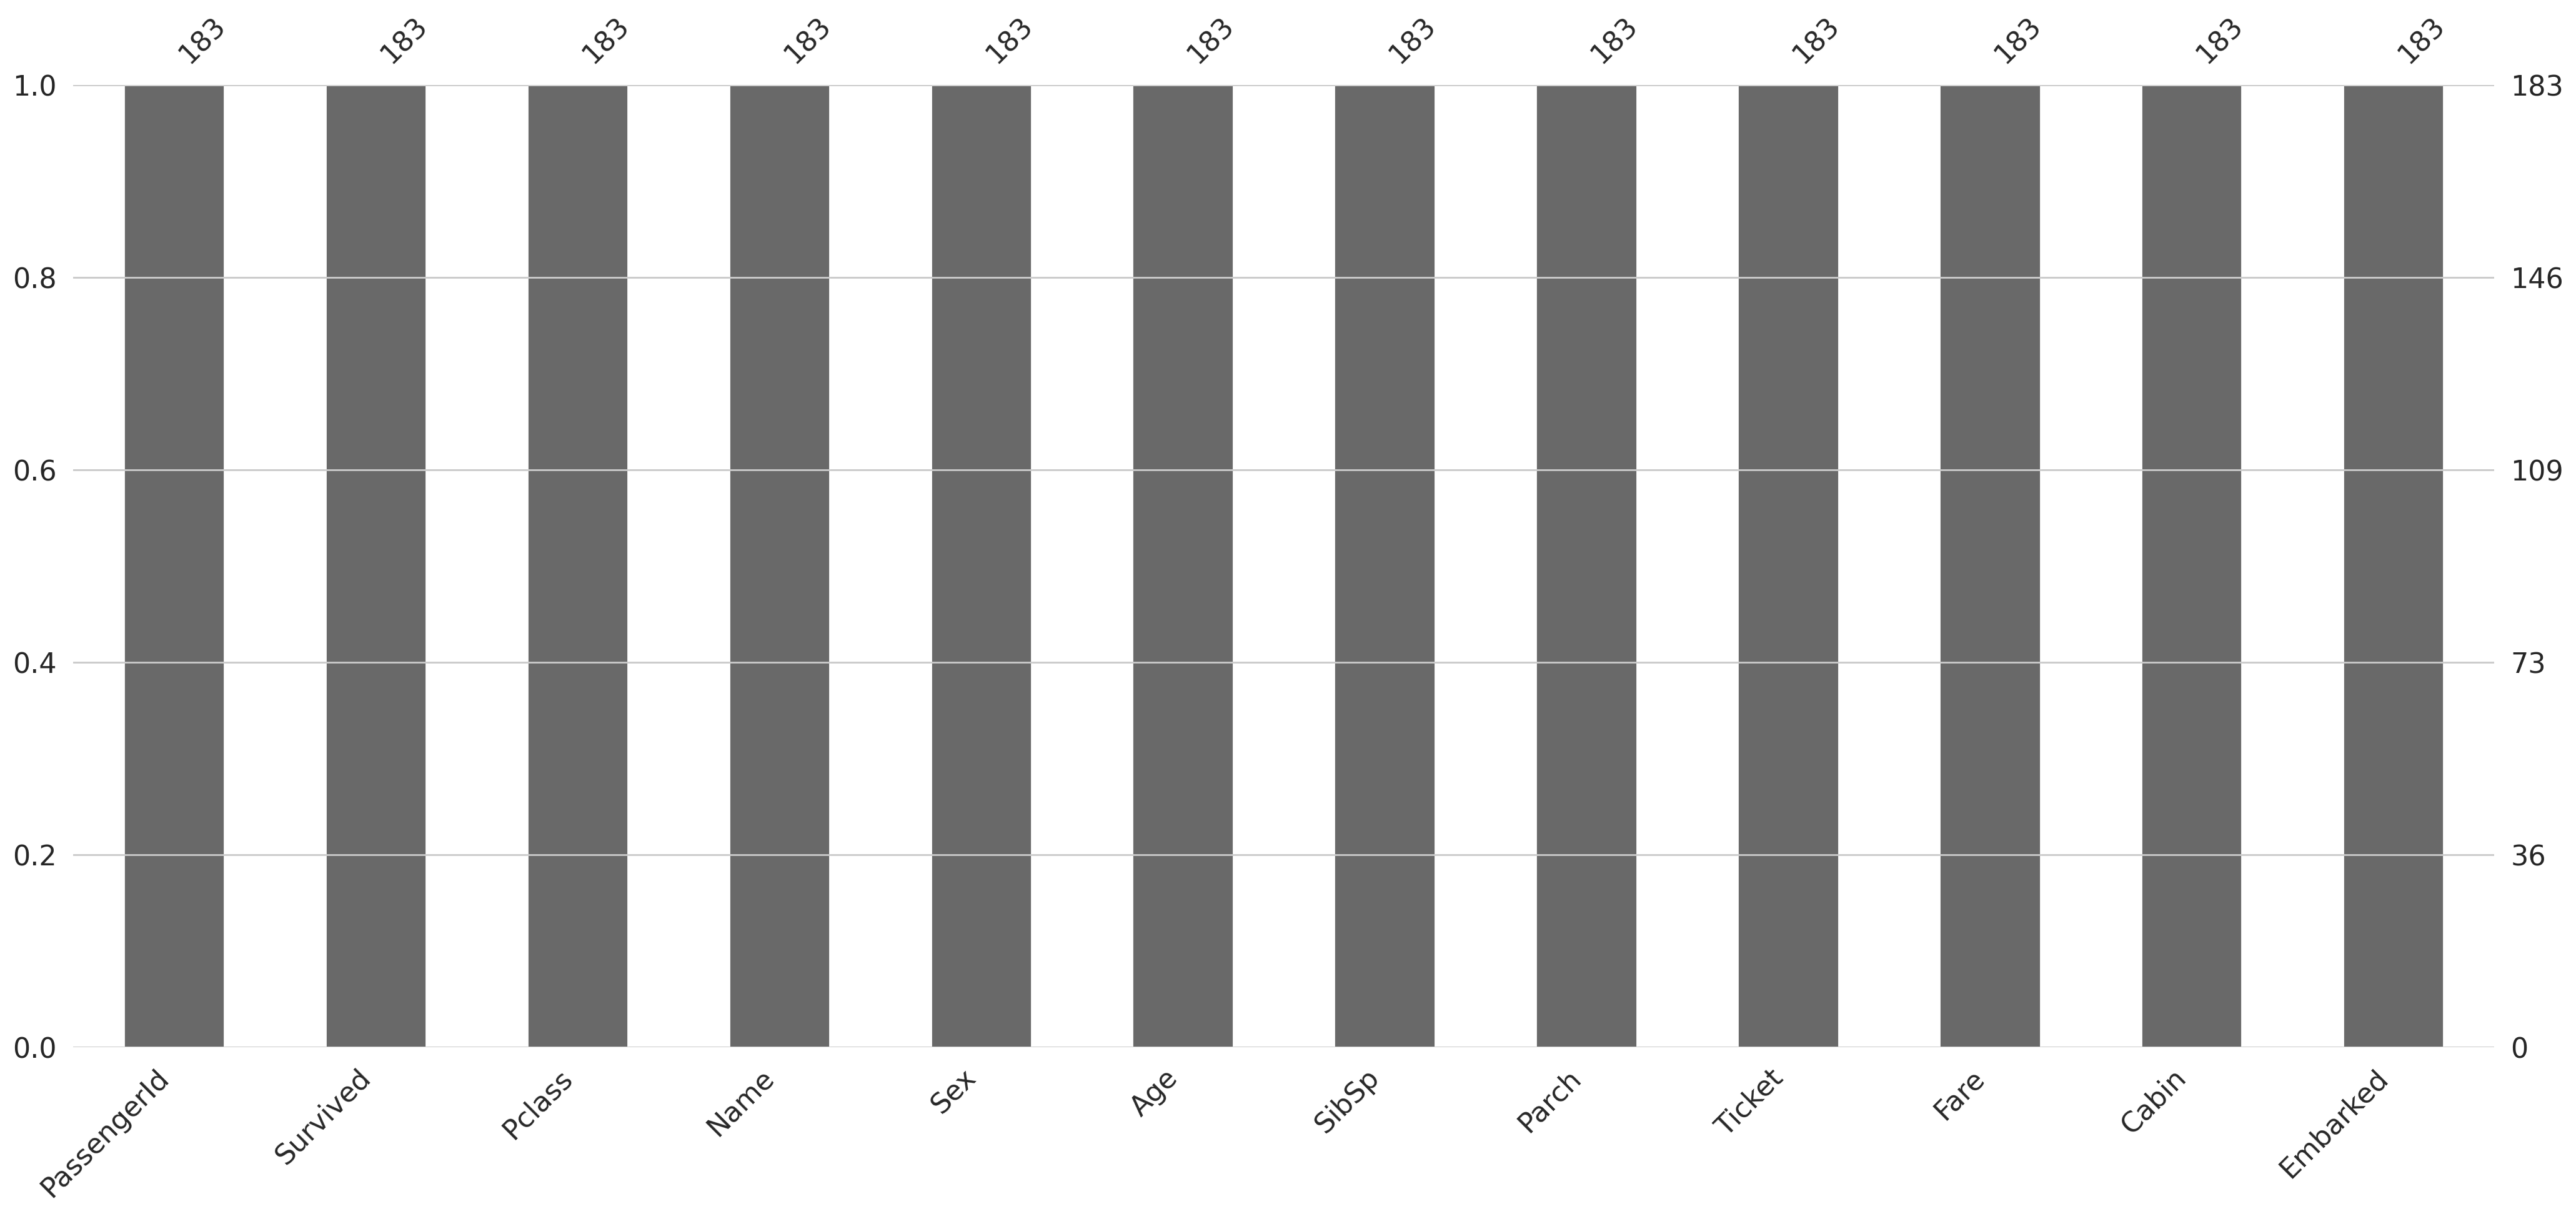

<Figure size 1200x500 with 0 Axes>

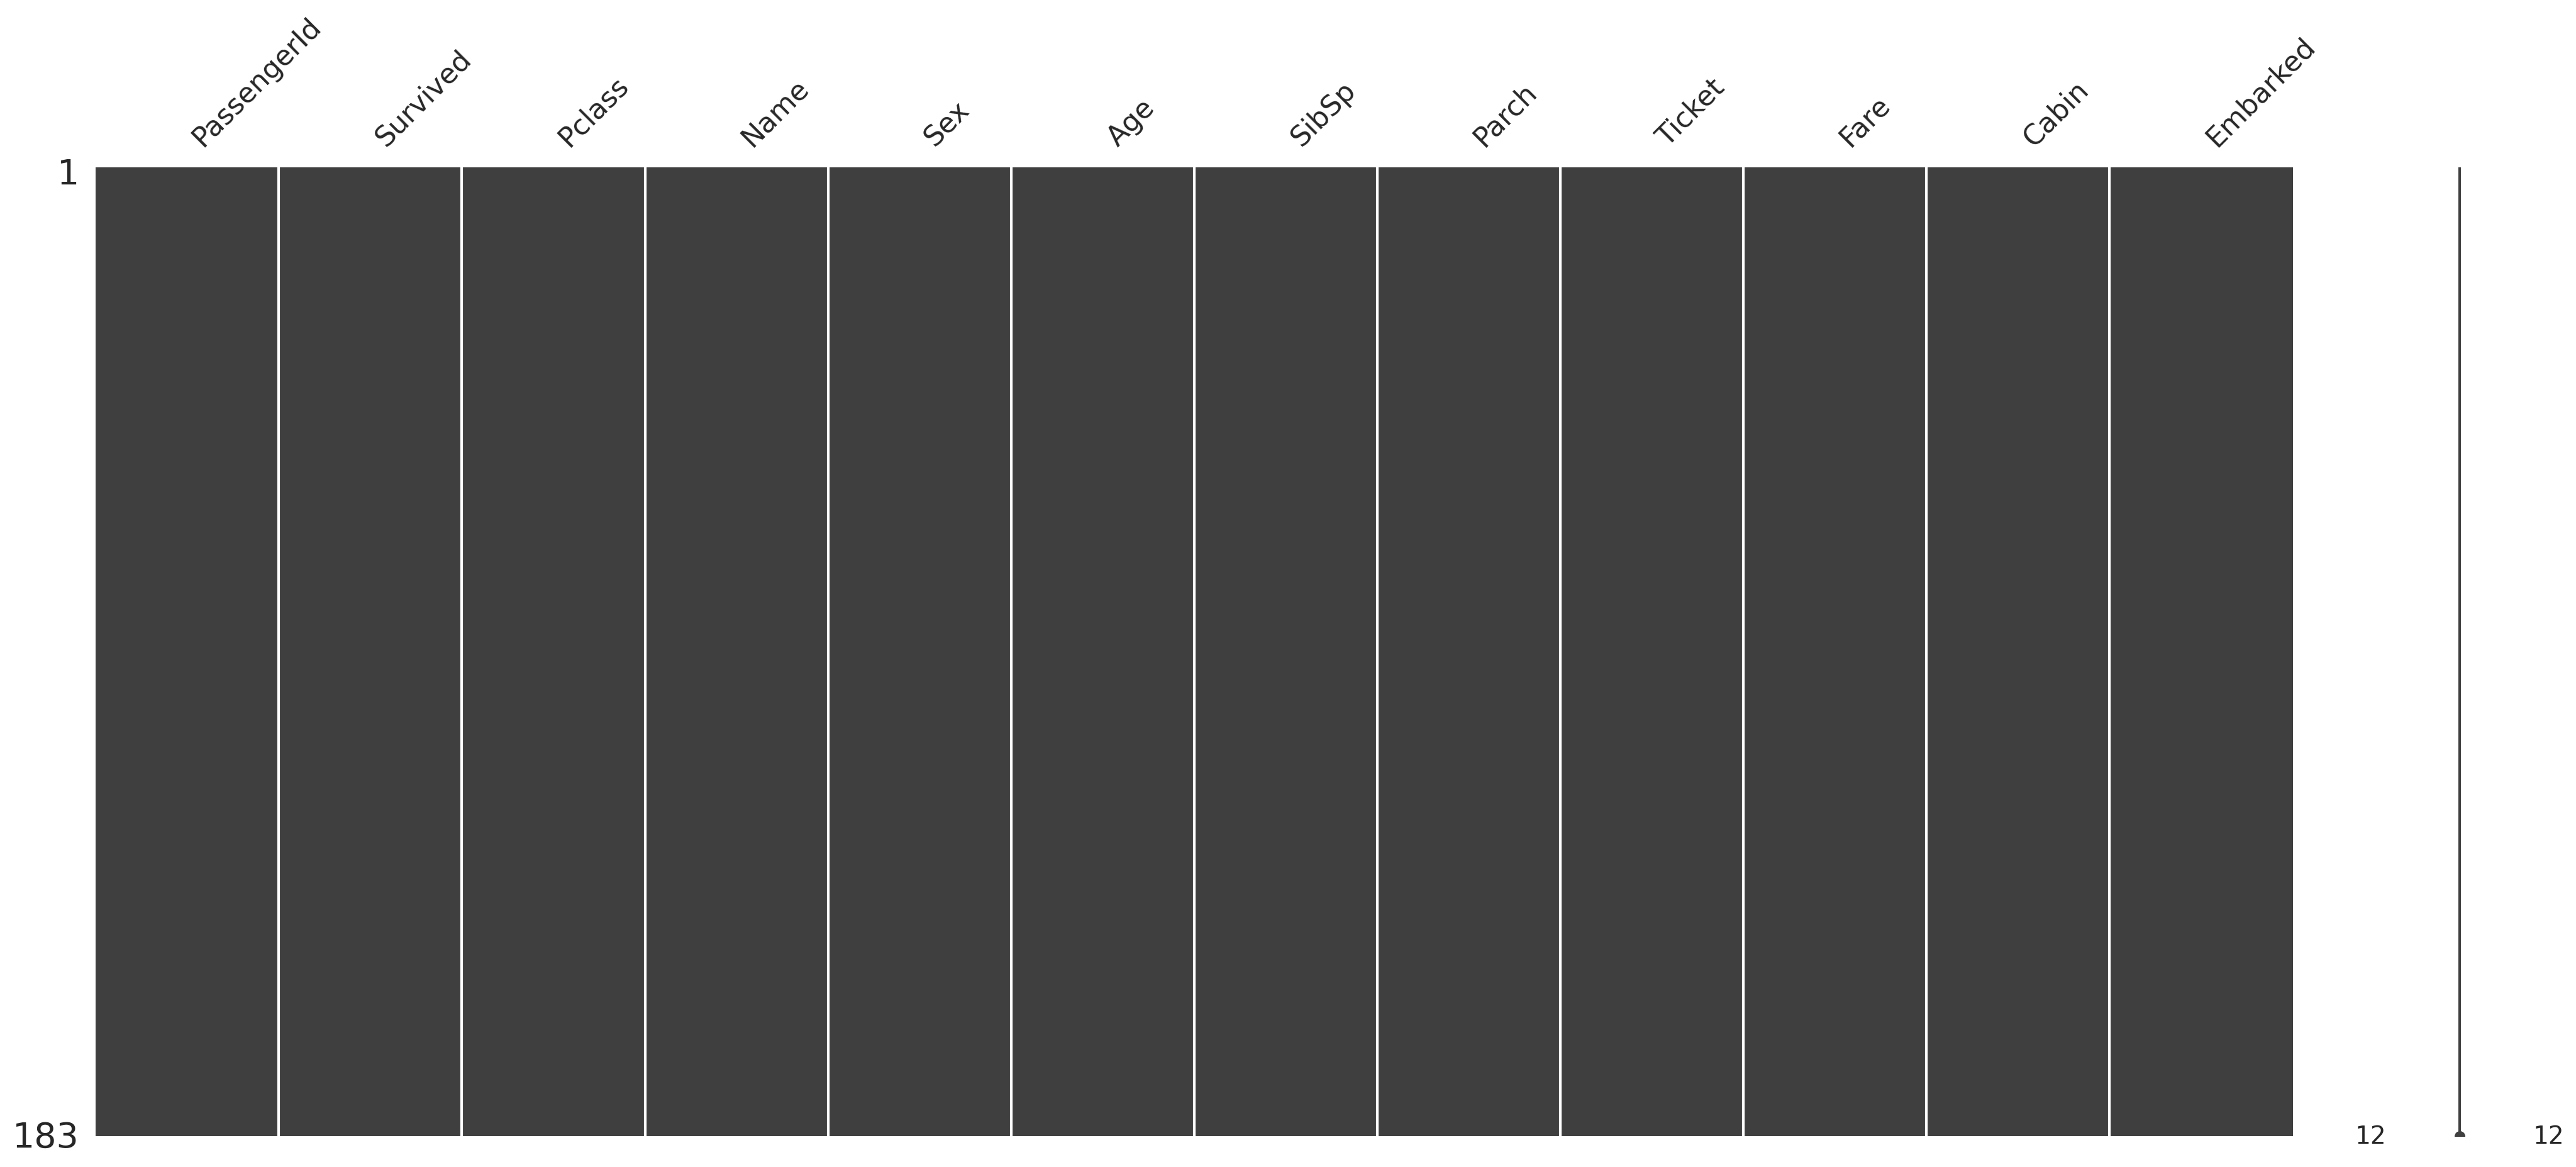

In [332]:
plot_missing_data(df_clean)

### **2.6.1.2 Imputación**

**Este proyecto no cuenta con Imputación**

### **2.6.2 Eliminación de columnas irrelevantes**

En esta fase de limpieza eliminaremos aquellas columnas que no aportan información relevante para el análisis que queremos realizar.

In [333]:
for col in cat_cols:
  print(f'Columna {col}: {df_clean[col].nunique()} subniveles')

Columna Name: 183 subniveles
Columna Sex: 2 subniveles
Columna Ticket: 127 subniveles
Columna Cabin: 133 subniveles
Columna Embarked: 3 subniveles


In [334]:
# La eliminación de columnas irrelevantes
df = df.drop(['Cabin', 'PassengerId'], axis=1)

Para convertir el *DataFrame* de Titanic en el formato **`X, y`** podemos hacer lo siguiente:

In [335]:
X = df_clean.drop(['Survived'], axis=1) # El conjunto de datos sin la variable objetivo 'Survived'.
y = df_clean['Survived']  # La columna de la variable objetivo 'Survived'.

print(X.shape)
print(y.shape)

(183, 11)
(183,)


Podemos ver que el conjunto de datos resultante tiene $712$ ejemplos con $9$ características.  

No incluimos **`Survived`** en **`X`** porque es la etiqueta que buscamos predecir. Incluirla sería un error conocido como **filtración de etiquetas**, que ocurre cuando se incluyen características durante el entrenamiento que proporcionan información de la etiqueta (o la misma etiqueta), que podría no estar disponible durante el tiempo de predicción. Imagínese entrenar un modelo para predecir la etiqueta, pero necesitarla como dato de entrada.

Aunque *Scikit-learn* acepta objetos convertibles a arreglos de *NumPy* como *DataFrames* y listas. Nos adelantaremos y convertiremos **`X`** y **`y`** en arreglos de NumPy.

In [336]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Primero veamos como convertir un objeto de *Pandas* a un arreglo de *NumPy*, esto se logra con el atributo **`values`** de un *DataFrame* o una *Serie*.

In [337]:
# .values retorna un arreglo de NumPy.
y = y.values

Separaremos **`X`** en dos arreglos de *NumPy*. Guardaremos las variables numéricas en **`X_numeric`** y las variables categóricas en **`X_categoric`**.

Las variables numéricas del conjunto de datos son: **`Age`**, **`SibSp`**, **`Parch`**, y **`Fare`**.

In [338]:
numeric = ['Age', 'SibSp', 'Parch', 'Fare']

# .values retorna un arreglo de NumPy.
X_numeric = X[numeric].values

print(X_numeric.shape)
print(type(X_numeric))

(183, 4)
<class 'numpy.ndarray'>


Veamos algunos ejemplos:

In [339]:
for i in range(5):
  print(f'Ejemplo {i}:')
  print('Variables:', X_numeric[i])
  print('Etiqueta:', y[i])
  print()

Ejemplo 0:
Variables: [38.      1.      0.     71.2833]
Etiqueta: 1

Ejemplo 1:
Variables: [35.   1.   0.  53.1]
Etiqueta: 1

Ejemplo 2:
Variables: [54.      0.      0.     51.8625]
Etiqueta: 0

Ejemplo 3:
Variables: [ 4.   1.   1.  16.7]
Etiqueta: 1

Ejemplo 4:
Variables: [58.    0.    0.   26.55]
Etiqueta: 1



Cómo podemos ver, son todas variables numéricas.


Las variables categóricas del conjunto de datos son: **`Pclass`**, **`Name`**, **`Sex`**, **`Ticket`** y **`Embarked`**. 

> Si bien **`Pclass`** está almacenada como un tipo numérico, representa una variable categórica ordinal.

Primero veamos cuántos valores únicos tiene cada una:

In [340]:
categoric = ['Name', 'Ticket', 'Pclass', 'Sex', 'Embarked']

for var in categoric:
  print(f'Valores posibles de {var}: \t{X[var].nunique()}')

Valores posibles de Name: 	183
Valores posibles de Ticket: 	127
Valores posibles de Pclass: 	3
Valores posibles de Sex: 	2
Valores posibles de Embarked: 	3


No tendremos en cuenta **`Name`** y **`Ticket`** para el siguiente ejemplo por su gran cantidad de valores posibles. En este caso usaremos solamente las variables **`Pclass`**, **`Sex`** y **`Embarked`**.

In [341]:
# .values retorna un arreglo de numpy
X_categoric = X[['Pclass', 'Sex', 'Embarked']].values

print(X_categoric.shape)
print(type(X_categoric))

(183, 3)
<class 'numpy.ndarray'>


Veamos algunos ejemplos:

In [342]:
ids = [0, 1, 15, 20]

for i in ids:
  print(f'Ejemplo {i}:')
  print('Variables:', X_categoric[i])
  print('Etiqueta:', y[i])
  print()

Ejemplo 0:
Variables: [1 'female' 'C']
Etiqueta: 1

Ejemplo 1:
Variables: [1 'female' 'S']
Etiqueta: 1

Ejemplo 15:
Variables: [1 'male' 'C']
Etiqueta: 0

Ejemplo 20:
Variables: [2 'female' 'S']
Etiqueta: 1



* Los valores $1$, $2$ y $3$ corresponden a la clase de viaje del pasajero de la variable **`Pclass`**.
* Los valores **`male`** y **`female`** corresponden a la variable **`Sex`** (género de la persona).
* Los valores **`S`**, **`C`** y **`Q`** corresponden a la variable **`Embarked`**. Estos indican el puerto de embarque que utilizó la persona, donde **`C = Cherbourg`**, **`Q = Queenstown`** y **`S = Southampton`**.

## **2.7. Visualizaciones Generales**

# **3. Preprocesamiento**
---

*Scikit-learn* expone el paquete **`preprocessing`** el cual contiene una serie de transformaciones para variables numéricas tanto como categóricas. 

La importancia del preprocesamiento radica en que puede potencialmente mejorar (o empeorar) el desempeño de los algoritmos de aprendizaje computacional. En el caso de variables categóricas para el caso de *Scikit-learn* no pueden ser usadas sin aplicar un preprocesamiento.

Las transformaciones de *Scikit-learn* son fáciles de usar. Estas implementan la interfaz **`Transformer`**, la cual expone los 3 siguientes métodos:

- **`fit(X)`**: *(del español ajustar)* permite aprender un conjunto de parámetros de **`X`** que son necesarios para aplicar la transformación (e.g la media, el mínimo o el máximo, el número de características, etc).

- **`transform(X)`**: *(del español transformar)* aplica el preprocesamiento a **`X`** y retorna **`X`** transformado.

- **`fit_transform(X)`**:*(del español ajustar y transformar)* aplica **`fit`** a **`X`** y retorna **`X`** transformado. Es utilizado como un atajo de una línea.

Algunas transformaciones no pueden usar **`transform`** sin haber usado **`fit`** previamente. De igual manera algunas transformaciones no necesitan parámetros y **`fit`** no tiene ningún efecto secundario.


En esta ocasión nosotros solo utilizaremos **`fit_transform`** para realizar el preprocesamiento.

## **3.1. Variables numéricas**
---

En esta ocasión introduciremos métodos de preprocesamiento numéricos bastante sencillos:

- **`StandardScaler`**
- **`MinMaxScaler`**

### **3.1.1. `StandardScaler`**
---

Veamos primero **`StandardScaler`**:

Este permite aplicar la transformación:

$$X^{\prime} = \frac{X - \mu}{\sigma}$$

Donde:
- $\mu\,$: Media aritmética de los datos.
- $\sigma\,$: Desviación estándar de los datos.

La transformación produce un nuevo conjunto de datos centrado en $0$ y con una desviación estándar de $1$.

In [343]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Declaramos el Transformer "StandardScaler"
X_numeric_standarized = scaler.fit_transform(X_numeric) # Transformamos la matriz "X_numeric"

Aunque **`X_numeric`** tiene varias características numéricas, la transformación se aplica a cada una de las columnas de manera independiente.

Veamos algunos ejemplos:

In [344]:
for i in range(3):
  print('Ejemplo:', i)
  print('Original: ', X_numeric[i])
  print('Estandarizado: ', X_numeric_standarized[i])
  print()

Ejemplo: 0
Original:  [38.      1.      0.     71.2833]
Estandarizado:  [ 0.14906507  0.83362754 -0.63172982 -0.0971798 ]

Ejemplo: 1
Original:  [35.   1.   0.  53.1]
Estandarizado:  [-0.0432295   0.83362754 -0.63172982 -0.3359971 ]

Ejemplo: 2
Original:  [54.      0.      0.     51.8625]
Estandarizado:  [ 1.17463611 -0.7230443  -0.63172982 -0.35225028]



### **3.1.2. `MinMaxScaler`**
---

**`MinMaxScaler`** permite escalar los datos a un rango específico, es decir, si una característica se encuentra en el rango **`[min(X), max(X)]`** y el argumento **`feature_range = (0, 1)`**, entonces cada valor será escalado de tal manera que esté en el rango **`[0, 1]`**.

In [345]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))  # Declaramos el Transformer "MinMaxScaler"
X_numeric_minmax = scaler.fit_transform(X_numeric) # Transformamos la matriz "X_numeric"

Al igual que **`StandardScaler`**, **`MinMaxScaler`** aplica su transformación a cada columna de manera independiente.

Veamos algunos ejemplos:

In [346]:
for i in range(3):
  print('Ejemplo:', i)
  print('Original: ', X_numeric[i])
  print('MinMax: ', X_numeric_minmax[i])
  print()

Ejemplo: 0
Original:  [38.      1.      0.     71.2833]
MinMax:  [0.46889226 0.33333333 0.         0.13913574]

Ejemplo: 1
Original:  [35.   1.   0.  53.1]
MinMax:  [0.43095599 0.33333333 0.         0.1036443 ]

Ejemplo: 2
Original:  [54.      0.      0.     51.8625]
MinMax:  [0.67121902 0.         0.         0.10122886]



In [347]:
# Valores mínimo y máximo de todo el dataset.
X_numeric_minmax.min(), X_numeric_minmax.max()

(np.float64(0.0), np.float64(1.0))

Como vemos, todos los valores están entre $0$ y $1$.

**`StandardScaler`** y **`MinMaxScaler`** realizan transformaciones similares y el desempeño de cada una es dependediente del conjunto de datos.

En nuestro ejemplo usaremos **`X_numeric_minmax`** para entrenar nuestros modelos.

## **3.2. Variables categóricas**
---

Típicamente, los modelos de aprendizaje computacional no aceptan como entrada variables categóricas las cuales pueden estar representadas con cadenas de texto. Antes de ser empleadas necesitan ser preprocesadas en valores numéricos.

En esta ocasión veremos un método muy popular conocido como *One Hot Encoding*.

Emplearemos *One Hot Encoding* sobre la variable **`Embarked`**.

*One Hot Encoding* codifica una variable con $n$ valores posibles enumerados como $1, 2, ..., n$ en un vector de tamaño $n$; donde la $i$-ésima posición del vector está asociada con el $i$-ésimo valor posible.

Asumiendo que un ejemplo tiene el $j$-ésimo valor posible de la variable original, se procesa de la siguiente manera:

- Se asigna 1 en la posición $j$.
- Se asigna 0 al resto.

La variable **`Embarked`** tiene los siguientes valores únicos: **`S, C, Q`**.

Lo verificamos con el método **`unique`** de *NumPy*.

In [348]:
# Obtenemos los valores únicos de un arreglo de NumPy con el método "unique".
print(np.unique(X_categoric[:,2]))

['C' 'Q' 'S']


Por lo tanto, al aplicar *One Hot Encoding* a los siguientes datos:

|Embarked|
|:--:|
|C|
|Q|
|S|

Se transformarían de la siguiente manera:

|C|Q|S|
|--|--|--|
|**1**|0|0|
|0|**1**|0|
|0|0|**1**|

In [349]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)     # Declaramos el Transformer "OneHotEncoder".
X_categoric_onehot = enc.fit_transform(X_categoric) # Usamos "fit_transform" para obtener la matriz transformada.
print(X_categoric_onehot.shape)
print(type(X_categoric_onehot))
print(X_categoric_onehot)

(183, 8)
<class 'numpy.ndarray'>
[[1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]]


Cómo podemos ver, la variable **`Sex`** con $2$ valores únicos, la variable **`Pclass`** con $3$ valores únicos y la variable **`Embarked`** con $3$ valores únicos fueron transformadas en $8$ variables distintas en total.

Veamos algunos ejemplos:

In [350]:
ids = [0, 1, 15, 20]
for i in ids:
  print('Ejemplo:', i)
  print('Original: ', X_categoric[i])
  print('One Hot: ', X_categoric_onehot[i])
  print()

Ejemplo: 0
Original:  [1 'female' 'C']
One Hot:  [1. 0. 0. 1. 0. 1. 0. 0.]

Ejemplo: 1
Original:  [1 'female' 'S']
One Hot:  [1. 0. 0. 1. 0. 0. 0. 1.]

Ejemplo: 15
Original:  [1 'male' 'C']
One Hot:  [1. 0. 0. 0. 1. 1. 0. 0.]

Ejemplo: 20
Original:  [2 'female' 'S']
One Hot:  [0. 1. 0. 1. 0. 0. 0. 1.]



Antes de continuar al entrenamiento de modelos de aprendizaje computacional, usando *NumPy* juntaremos las variables numéricas preprocesadas y las variables categóricas preprocesadas en el arreglo **`X_full`**. Para esto usaremos la función **`np.concatenate`** para concatenar **`X_numeric_minmax`** y **`X_categoric_onehot`** a través del axis $1$ (columnas).

In [351]:
X_full = np.concatenate((X_numeric_minmax, X_categoric_onehot),
                        axis=1) # Concatenamos por el eje vertical (columnas)
print(X_full.shape)

(183, 12)


# **4. Entrenamiento de modelos** 
---

En esta sección entrenaremos dos modelos de regresión logística. 
- Uno utilizando solo las variables numéricas preprocesadas. 
- Otro usando las variables numéricas y categóricas, ambas preprocesadas. 

Generalmente los algoritmos de aprendizaje computacional son entrenados en una partición de **entrenamiento** (***train***) y probados en una partición de datos de **prueba** (***test***). 

- Los datos de **entrenamiento** son aquellos datos de los cuales el algoritmo aprende.
- Los datos de **prueba** son aquellos que se usan para estimar el desempeño del algoritmo en datos desconocidos por el modelo. 

Las particiones **NO** deben compartir datos. Con ayuda de *scikit-learn* podemos crear particiones de entrenamiento y prueba para hacer esto fácilmente.

## **4.1. Partición de entrenamiento y prueba**
---

*Scikit-learn* permite realizar una partición de entrenamiento y prueba fácilmente con la función **`train_test_split`** del paquete **`model_selection`**.

**`train_test_split(X, y)`** retorna una tupla **`X_train, X_test, y_train, y_test`** donde **`X_train, X_test`** son la partición entrenamiento - prueba de **`X`** y **`y_train, y_test`** son la partición de entrenamiento y prueba de **`y`**.

Tenga en cuenta que usted le puede poner cualquier nombre a las variables que retorna train_test_split, lo anterior es solo una convención.

Usando el parámetro **`test_size`** podemos indicar, con un número entre 0 y 1, el porcentaje de datos que deseamos usar para la partición de prueba.

Un ejemplo básico de uso, con $30\%$ de los datos para pruebas y $70\%$ para entrenamiento sería el siguiente:

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
```

En nuestro caso le indicamos a **`train_test_split`** que utilice el $30\%$ de los datos como datos de prueba y la utilizamos con **`X_numeric_minmax`** y **`X_full`**.

A continuación importamos **`train_test_split`** del submódulo **`sklearn.model_selection`**.

In [ ]:
# Submódulo de selección de modelos y partición de datos.
from sklearn.model_selection import train_test_split

# Lo usamos sobre **`X_numeric_minmax`**:
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numeric_minmax, 
                                                                    y, 
                                                                    test_size=0.2, 
                                                                    random_state=42)

In [ ]:
# Y lo usamos sobre **`X_full`**:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, 
                                                                        y,
                                                                        test_size=0.2, 
                                                                        random_state=42)

**`train_test_split`** realiza la partición de manera aleatoria. Para especificar la semilla aleatoria se puede utilizar el parámetro **`random_state`**.

En este caso como tenemos dos versiones de **`X`** (**`X_numeric_minmax`** y **`X_full`**) y hemos utilizado la misma semilla aleatoria en ambos llamados de la función para asegurarnos que los ejemplos, aún con diferentes características, sean consistentes sobre cada partición.

Podemos verificar que efectivamente se respetó el ordenamiento:

In [354]:
print(all(y_train_num == y_train_full))
print(all(y_test_num == y_test_full))

True
True


Para simplificar las cosas asignamos las variables **`y_train`** y **`y_test`**:

In [355]:
y_train = y_train_num
y_test = y_test_num

## **4.2. Entrenamiento**
---

Debido a que el conjunto de datos *Titanic* plantea un problema de clasificación (supervivencia), usaremos un modelo de clasificación lineal llamado regresión logística. 

Los modelos de clasificación buscan discernir el grupo al que pertenece un ejemplo (i.e., predecir su etiqueta).

Un modelo de clasificación recibe un conjunto de variables **`x`** (características) y produce una salida **`y`** (etiqueta) la cual es la predicción del modelo. 

La salida de un modelo de clasificación suele estar codificada como un número. El numero está asociado a la clase (que el modelo predice) que pertenece el ejemplo.

Utilizaremos el modelo generado por la función **`LogisticRegression`** del paquete **`linear_model`** de *Scikit-learn*.

En *scikit-learn* los modelos suelen implementar la interfaz **`Estimator`** y **`Predictor`**. 

Por ahora nos interesa saber que:

- Los **`Estimator`** implementan **`fit(X, y)`**.
- Los **`Predictor`** implementan **`predict(X)`**.

Los modelos deben ser *ajustados* antes de ser utilizados para realizar cualquier predicción.

En *scikit-learn* entrenar un modelo de aprendizaje computacional es tan sencillo como importarlo, crear una instancia y utilizar **`fit`**.

> **Nota:** Para nuestro ejemplo, en el entrenamiento utilizaremos cada versión de **`X_train`** (**`X_train_num`** y **`X_train_full`**) con el objetivo de entrenar dos modelos distintos.

## **4.3. Clasificador de variables numéricas**
---

Primero entrenaremos una regresión logística utilizando únicamente las variables numéricas.

Importamos el paquete **`linear_model`** que incluye la clase **`LogisticRegression`**.

In [356]:
# Submódulo de modelos lineales.
from sklearn import linear_model

Creamos una instancia de **`LogisticRegression`** y la guardamos en la variable **`clf_numeric`**.

In [357]:
clf_numeric = linear_model.LogisticRegression()

**`clf_numeric`** no ha sido entrenado, para esto usamos el método **`fit`** con:
 - **`X_train_num`**: matriz con las características numéricas de la partición de entrenamiento. 
 - **`y_train`**: vector con las etiquetas de la partición de entrenamiento.

In [358]:
clf_numeric.fit(X_train_num, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## **4.4. Clasificador de variables numéricas y categóricas**
---

Para entrenar un segundo modelo con todas las variables numéricas y categóricas (preprocesadas) realizamos los siguientes pasos:

Creamos una instancia y la guardamos en **`clf_full`**:

In [359]:
# Variables numéricas y categóricas.
clf_full = linear_model.LogisticRegression()

Utilizamos **`fit`** pero esta vez con **`X_train_full`**, la matriz con las características tanto numéricas como categóricas de la partición de entrenamiento. 

In [360]:
clf_full.fit(X_train_full, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# **5. Evaluación** 
---

- Calcularemos la exactitud y el error de cada clasificador entrenado en la partición de entrenamiento y prueba.
  - La exactitud se define como:
  $$\text{exactitud} = \frac{\text{Número de ejemplos correctamente clasificados}}{\text{Número total de ejemplos}}$$
  - y el error se define como:
  $$\text{error} = 1.0\, - \text{exactitud}$$
En *scikit-learn* la **exactitud** se puede calcular mediante la función **`accuracy_score`** del paquete **`metrics`**.

> **Nota**: Se profundizará en distintas métricas de rendimiento en las unidades siguientes.

A continuación, importamos **`accuracy_score`**.

In [361]:
from sklearn.metrics import accuracy_score

## **5.1. Clasificador variables numéricas**
---

Primero veamos algunas predicciones del modelo sobre la partición de prueba, para esto debemos usar el método **`predict`**:

In [369]:
# El método predict se debería utilizar sobre un clasificador entrenado previamente.

y_pred = clf_numeric.predict(X_test_num) # Retorna un arreglo con la predicción de la variable objetivo por cada ejemplo.

for i in range(15):
  print(f'Predicho: {y_pred[i]}, Etiqueta: {y_test[i]}\n')  

Predicho: 1, Etiqueta: 0

Predicho: 1, Etiqueta: 0

Predicho: 1, Etiqueta: 1

Predicho: 1, Etiqueta: 0

Predicho: 1, Etiqueta: 1

Predicho: 1, Etiqueta: 0

Predicho: 1, Etiqueta: 0

Predicho: 1, Etiqueta: 1

Predicho: 1, Etiqueta: 1

Predicho: 1, Etiqueta: 0

Predicho: 1, Etiqueta: 0

Predicho: 1, Etiqueta: 1

Predicho: 1, Etiqueta: 0

Predicho: 1, Etiqueta: 1

Predicho: 1, Etiqueta: 0



Como podemos ver, el modelo solo se equivoca en $2$ de los primeros $5$ ejemplos. Note que **`predict`** acepta una matriz, un error común es tratar de usar **`predict`** con vectores.

Para calcular la exactitud sobre toda la partición de prueba utilizamos **`accuracy_score`**:

> **`accuracy_score`** recibe como primer parámetro las etiquetas reales y como segundo parámetro las etiquetas predichas.

In [363]:
# Obtenemos la predicción del clasificador usando variables numéricas.
y_pred = clf_numeric.predict(X_test_num)

# Calculamos la exactitud de la predicción.
acc = accuracy_score(y_test, y_pred)

print(f'Exactitud en prueba {acc}')
print(f'Error en prueba: {1.0 - acc}')

Exactitud en prueba 0.6363636363636364
Error en prueba: 0.36363636363636365


Veamos las métricas sobre la partición de entrenamiento:

In [364]:
# Obtenemos la predicción del clasificador usando tanto variables numéricas como categóricas.
y_pred = clf_numeric.predict(X_train_num)

# Calculamos la exactitud de la predicción.
acc = accuracy_score(y_train, y_pred)

print(f'Exactitud en entrenamiento {acc}')
print(f'Error en entrenamiento: {1.0 - acc}')

Exactitud en entrenamiento 0.6875
Error en entrenamiento: 0.3125


Como podemos ver, el error de entrenamiento es menor que el error de prueba.

## **5.2. Clasificador variables numéricas y categóricas**
---

Veamos las métricas sobre la partición de entrenamiento:

In [365]:
y_pred = clf_full.predict(X_train_full)
acc = accuracy_score(y_train, y_pred)

print(f'Exactitud en entrenamiento {acc}')
print(f'Error en entrenamiento: {1.0 - acc}')

Exactitud en entrenamiento 0.78125
Error en entrenamiento: 0.21875


Veamos las métricas sobre la partición de prueba:

In [366]:
y_pred = clf_full.predict(X_test_full)
acc = accuracy_score(y_test, y_pred)

print(f'Exactitud en prueba {acc}')
print(f'Error en prueba: {1.0 - acc}')

Exactitud en prueba 0.7090909090909091
Error en prueba: 0.2909090909090909


Cómo podemos ver incluir las variables categóricas mejora el desempeño del mismo algoritmo substancialmente. 

En *Titanic* un indicador de supervivencia muy importante es el género, una proporción mucho más grande de mujeres que de hombres sobrevivieron a la tragedia. Esto puede ser utilizado para interpretar la mejora de desempeño del modelo.

## **Recursos adicionales**
---

Los siguientes enlaces corresponden a sitios en donde encontrará información muy útil para profundizar en el conocimiento de las funcionalidades de la librería *Scikit-learn*:

- [*Scikit-learn - Datasets*](https://scikit-learn.org/stable/datasets.html)
- [*Scikit-learn - Preprocessing*](https://scikit-learn.org/stable/modules/preprocessing.html)
- [*Scikit-learn - Linear models*](https://scikit-learn.org/stable/modules/linear_model.html)

# **Créditos**
---

* **Docente:** Xisca 
* **Equipo:**
  - [Alejandro Gerena](https://github.com/hagr27)

**IronHack. Madrid-España** - *Especialista Big Data*